<a href="https://colab.research.google.com/github/Altaieb-Mohammed/lab_2corse/blob/master/c_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Logistic Regression:
Accuracy: 0.811
F1-score: 0.2947761194029851
Confusion Matrix:
 [[1543   64]
 [ 314   79]]
ROC AUC: 0.7788998829864888

Linear SVM:
Accuracy: 0.8035
F1-score: 0.0
Confusion Matrix:
 [[1607    0]
 [ 393    0]]
ROC AUC: 0.6777884921407772

Perceptron:
Accuracy: 0.7725
F1-score: 0.3671766342141864
Confusion Matrix:
 [[1413  194]
 [ 261  132]]

Best Poly SVM params: {'svc__C': 10, 'svc__degree': 3, 'svc__kernel': 'poly'}
Poly SVM Accuracy: 0.8595

Best RBF SVM params: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
RBF SVM Accuracy: 0.856


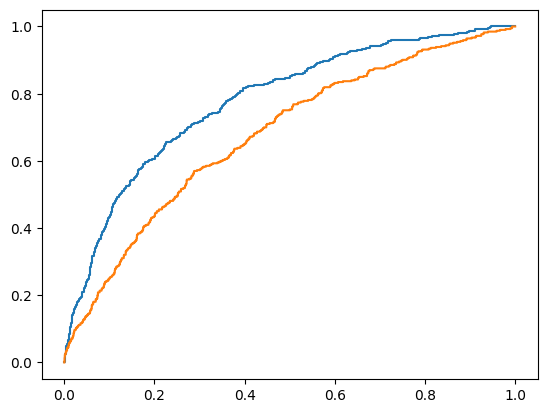

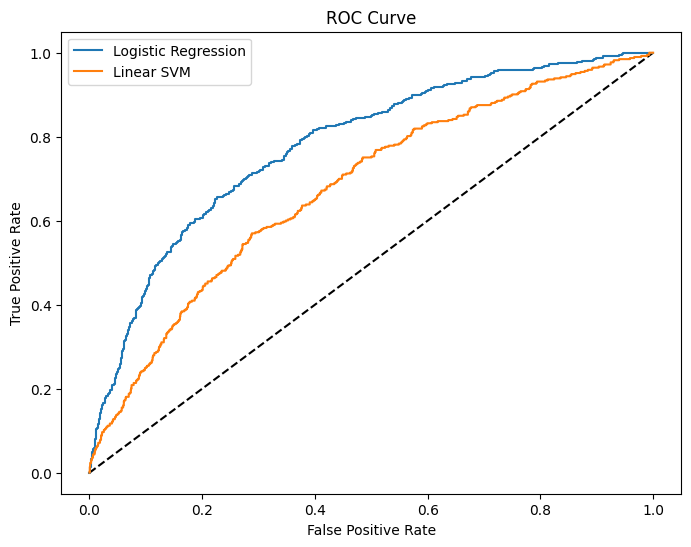

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Model Comparison:
                 Model  Accuracy  F1-score   ROC AUC  \
0  Logistic Regression    0.8110  0.294776  0.778900   
1           Linear SVM    0.8035  0.000000  0.677788   
2           Perceptron    0.7725  0.367177       NaN   
3             Poly SVM    0.8595  0.533997  0.384153   
4              RBF SVM    0.8560  0.510204  0.705063   

            Confusion Matrix  
0    [[1543, 64], [314, 79]]  
1      [[1607, 0], [393, 0]]  
2  [[1413, 194], [261, 132]]  
3   [[1558, 49], [232, 161]]  
4   [[1562, 45], [243, 150]]  


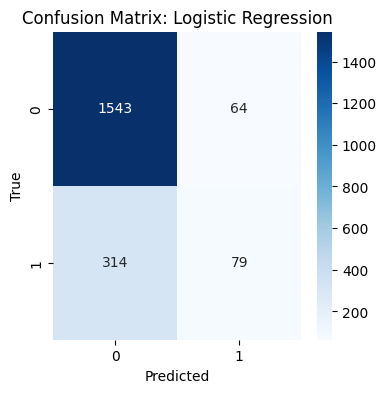

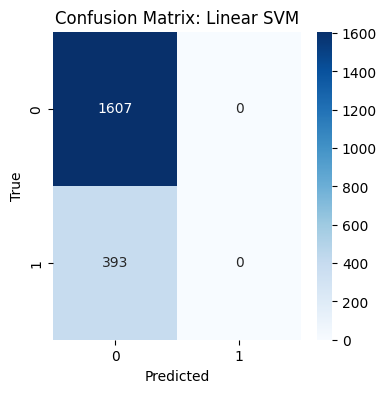

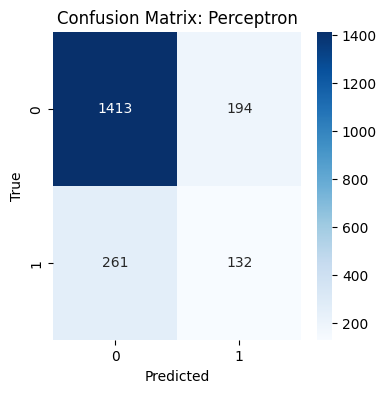

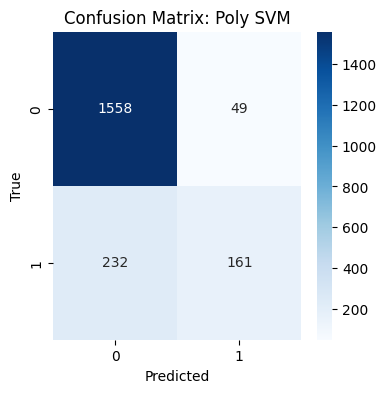

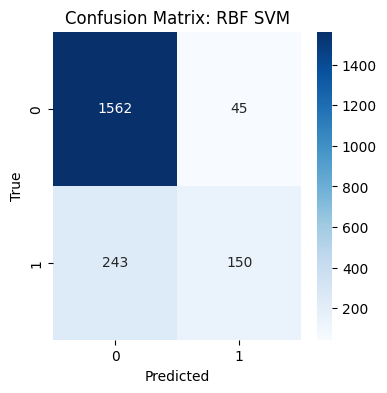

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline

# 1. Загрузка данных
url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/master/bank_customers_cleaned.csv"
data = pd.read_csv(url)

# 2. Подготовка признаков и целевой переменной
target = 'churn'
features = [col for col in data.columns if col not in ['customer_id', target]]

X = data[features]
y = data[target]

# 3. One-hot кодирование категориальных признаков
X = pd.get_dummies(X, drop_first=True)

# 4. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Обучение базовых моделей классификации
def evaluate_model(model, X_train, y_train, X_test, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    print(f"\n{name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    if y_proba is not None:
        print("ROC AUC:", roc_auc_score(y_test, y_proba))
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=name)
    return y_pred, y_proba

# Логистическая регрессия
lr = LogisticRegression(max_iter=1000, random_state=42)
evaluate_model(lr, X_train_scaled, y_train, X_test_scaled, y_test, "Logistic Regression")

# Линейный SVM
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
evaluate_model(svm_linear, X_train_scaled, y_train, X_test_scaled, y_test, "Linear SVM")

# Перцептрон
perceptron = Perceptron(random_state=42)
evaluate_model(perceptron, X_train_scaled, y_train, X_test_scaled, y_test, "Perceptron")

# 7. SVM с различными ядрами и настройка гиперпараметров
# Полиномиальное ядро
param_grid_poly = {
    'svc__kernel': ['poly'],
    'svc__degree': [2, 3, 4],
    'svc__C': [0.1, 1, 10]
}
# Радиальное ядро
param_grid_rbf = {
    'svc__kernel': ['rbf'],
    'svc__gamma': ['scale', 'auto', 0.1, 1],
    'svc__C': [0.1, 1, 10]
}

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True, random_state=42))
])

# Поиск по сетке для полиномиального ядра
grid_poly = GridSearchCV(pipe, param_grid_poly, cv=5, scoring='accuracy')
grid_poly.fit(X_train, y_train)
print("\nBest Poly SVM params:", grid_poly.best_params_)
y_pred_poly = grid_poly.predict(X_test)
print("Poly SVM Accuracy:", accuracy_score(y_test, y_pred_poly))

# Поиск по сетке для радиального ядра
grid_rbf = GridSearchCV(pipe, param_grid_rbf, cv=5, scoring='accuracy')
grid_rbf.fit(X_train, y_train)
print("\nBest RBF SVM params:", grid_rbf.best_params_)
y_pred_rbf = grid_rbf.predict(X_test)
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))

# 8. Визуализация ROC-кривых
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')

# Логистическая регрессия и SVM снова вычисляют вероятности для ROC
lr.fit(X_train_scaled, y_train)
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')

svm_linear.fit(X_train_scaled, y_train)
y_proba_svm = svm_linear.predict_proba(X_test_scaled)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
plt.plot(fpr_svm, tpr_svm, label='Linear SVM')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 9. Сравнение производительности моделей
models = {
    'Logistic Regression': lr,
    'Linear SVM': svm_linear,
    'Perceptron': perceptron,
    'Poly SVM': grid_poly.best_estimator_,
    'RBF SVM': grid_rbf.best_estimator_
}

results = []
for name, model in models.items():
    y_pred = model.predict(X_test_scaled if name in ['Logistic Regression', 'Linear SVM', 'Perceptron'] else X_test)
    y_proba = (model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba')
               else None if name == 'Perceptron'
               else model.predict_proba(X_test)[:, 1])
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else None,
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

# 10. Визуализация матриц ошибок
for model_name in models.keys():
    cm = confusion_matrix(y_test, models[model_name].predict(
        X_test_scaled if model_name in ['Logistic Regression', 'Linear SVM', 'Perceptron'] else X_test
    ))
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
